In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Out.csv')
print(data.shape)
data


(3, 4)


,NumVert,EdgeDens,DFS,Rand
0,100,0.01,0.000083,0.000056
1,10100,0.01,0.081882,0.658686
2,20100,0.01,0.356840,2.683150


(5, 4)


Text(0, 0.5, 'time')

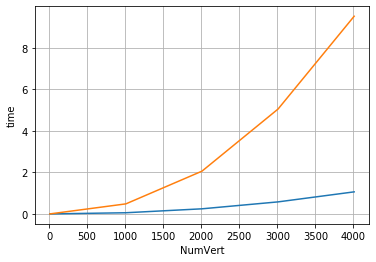

In [26]:
data = pd.read_csv('Out.csv')
print(data.shape)
data
rad, = plt.plot(data['NumVert'], data['DFS'], label='DFS')
sor, = plt.plot(data['NumVert'], data['Rand'], label='RAND')
plt.grid()
# plt.ylim(0, 1)
plt.xlabel('NumVert')
plt.ylabel('time')
# plt.legend(handles=[dfs, rand])

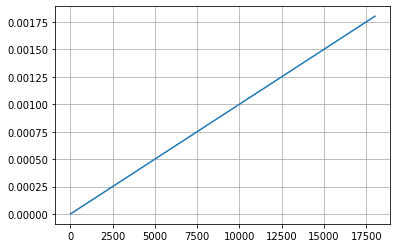

In [19]:
plt.plot(data['NumVert'], 0.0000001 * data['NumVert'])
plt.grid()
# plt.ylim(0, 2500)


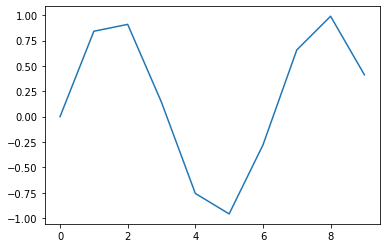

In [4]:
x = range(10)
y = np.sin(x)
plt.plot(x, y)